In [1]:
# !dir

In [5]:
import pandas as pd
file_path = "./ref/청소년정신건강20250304.csv"
ori = pd.read_csv(file_path)
ori

,시점,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [6]:
# 컬럼명 지정
new_name = ['시점','스트레스','스트레스남학생','스트레스여학생','우울감경험율','우울남학생','우울여학생','자살생각률','자살남학생','자살여학생']
ori.columns = new_name
ori 

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [7]:
# 시점을 없애고, 0번 행도 없앰.
ori = ori.loc[1:,'스트레스':]
ori

,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
1,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [8]:
# 2번 인덱스 행을 생성 , 100에서 값을 뺀 값
ori.loc[2] = 100 - ori.loc[1,'스트레스':].astype(float)
# 마지막에 응답컬럼을 생성, 그렇다 or 아니다.
ori['응답'] = ['그렇다','아니다']
ori

,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생,응답
1,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4,그렇다
2,54.7,60.4,48.7,71.8,76.1,67.4,85.8,88.9,82.6,아니다


In [9]:
ori = ori.set_index('응답')
ori

,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4
아니다,54.7,60.4,48.7,71.8,76.1,67.4,85.8,88.9,82.6


In [10]:
# OS에 사용가능한 , 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist

['/usr/share/texmf/fonts/opentype/public/lm/lmsans10-regular.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmsans9-oblique.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmroman9-italic.otf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmono10-regular.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmsans8-regular.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmsans17-oblique.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmroman7-bold.otf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/opentype/urw-base35/URWBookman-Light.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmono12-regular.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusMonoPS-Regular.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmsans10-oblique.otf',
 '/usr/share/fonts/truetype/liberation/

Text(0.2, 0.4, '한글')

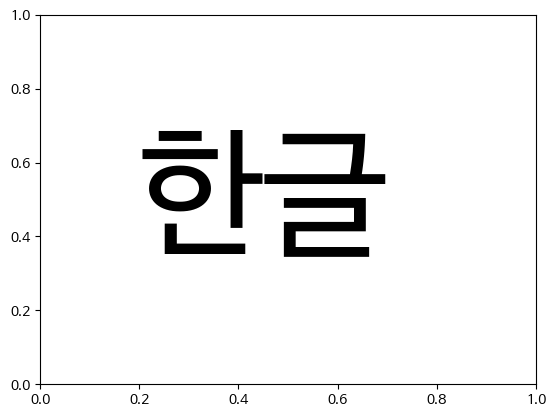

In [11]:
# 윈도우용 폰트 경로 설정
# path = "C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf"
# font_name = fm.FontProperties(fname=path).get_name()
# rc('font',family=font_name)
# 리눅스용 폰트 경로 설정
plt.rc('font',family="NanumBarunGothic")
plt.text(0.2,0.4,'한글',size=100)

<Axes: ylabel='스트레스'>

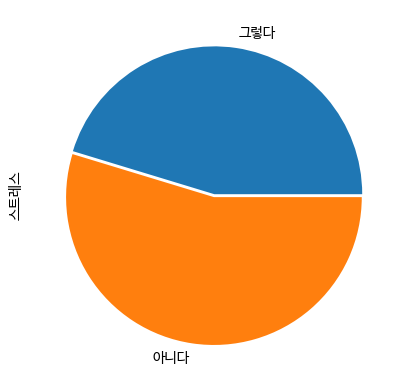

In [12]:
ori['스트레스'].astype(float).plot.pie(explode = [0, 0.02])

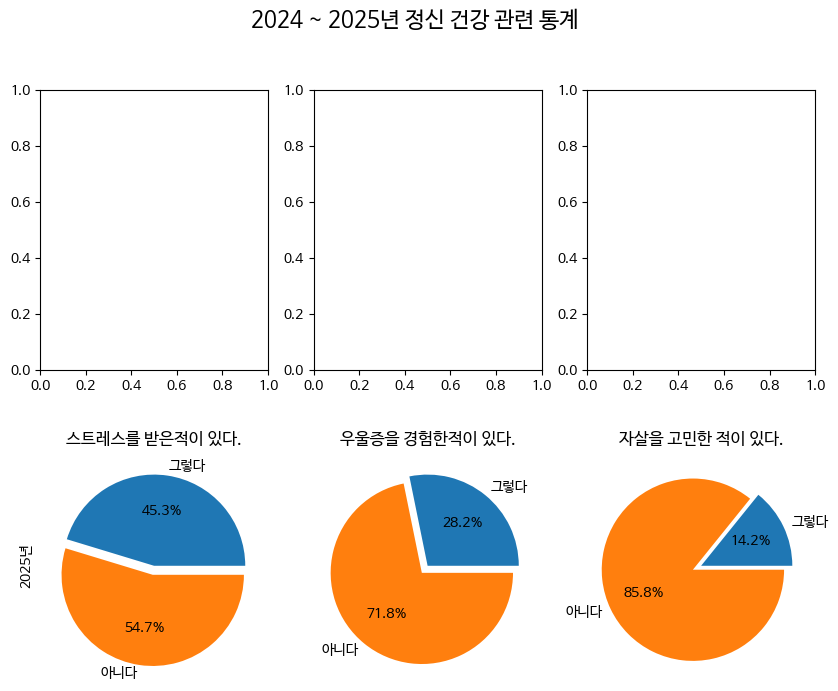

In [13]:
fig, ax = plt.subplots(2,3,figsize=(10,8))

ori['스트레스'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[1][0], autopct="%.1f%%")
ax[1][0].set_title('스트레스를 받은적이 있다.')
ax[1][0].set_ylabel('2025년')

ori['우울감경험율'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[1][1], autopct="%.1f%%")
ax[1][1].set_title('우울증을 경험한적이 있다.')
ax[1][1].set_ylabel('')

ori['자살생각률'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[1][2], autopct="%.1f%%")
ax[1][2].set_title('자살을 고민한 적이 있다.')
ax[1][2].set_ylabel('')

plt.suptitle('2024 ~ 2025년 정신 건강 관련 통계',fontsize=16)
plt.show()

In [14]:
import pandas as pd
file_path = "./ref/청소년정신건강_20250304-2.csv"
com = pd.read_csv(file_path)
com

,시점,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2023,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9


In [15]:
new_name = ['시점','스트레스','스트레스남학생','스트레스여학생','우울감경험율','우울남학생','우울여학생','자살생각률','자살남학생','자살여학생']
com.columns = new_name
com

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2023,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9


In [16]:
com = com.loc[1:,'스트레스':]
com

,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
1,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9


In [17]:
com.loc[2] = 100 - com.loc[1,'스트레스':].astype(float)
com['응답'] = ['그렇다','아니다']
com

,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생,응답
1,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9,그렇다
2,60.4,66.6,53.8,72.5,76.7,68.0,85.5,89.5,81.1,아니다


In [18]:
com = com.set_index('응답')
com

,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각률,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9
아니다,60.4,66.6,53.8,72.5,76.7,68.0,85.5,89.5,81.1


<Axes: ylabel='스트레스'>

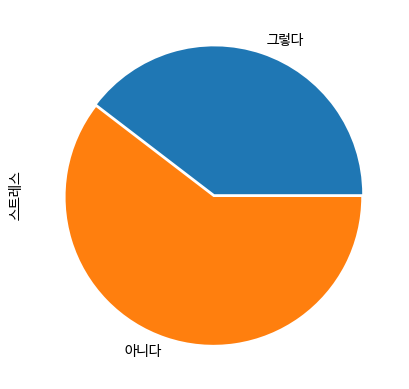

In [19]:
com['스트레스'].astype(float).plot.pie(explode = [0, 0.02])

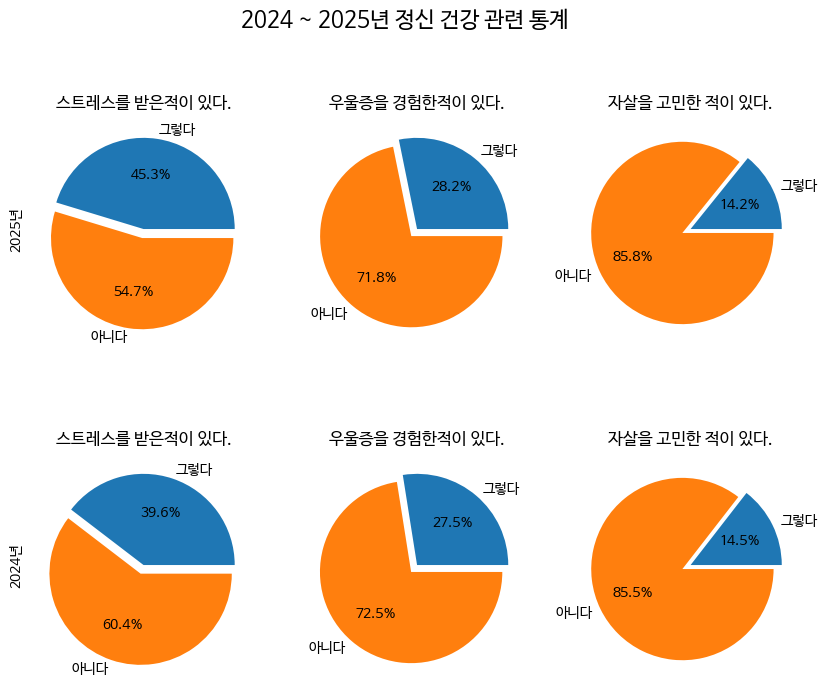

In [20]:
fig, ax = plt.subplots(2,3,figsize=(10,8))

ori['스트레스'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[0][0], autopct="%.1f%%")
ax[0][0].set_title('스트레스를 받은적이 있다.')
ax[0][0].set_ylabel('2025년')

ori['우울감경험율'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[0][1], autopct="%.1f%%")
ax[0][1].set_title('우울증을 경험한적이 있다.')
ax[0][1].set_ylabel('')

ori['자살생각률'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[0][2], autopct="%.1f%%")
ax[0][2].set_title('자살을 고민한 적이 있다.')
ax[0][2].set_ylabel('')

com['스트레스'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[1][0], autopct="%.1f%%")
ax[1][0].set_title('스트레스를 받은적이 있다.')
ax[1][0].set_ylabel('2024년')

com['우울감경험율'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[1][1], autopct="%.1f%%")
ax[1][1].set_title('우울증을 경험한적이 있다.')
ax[1][1].set_ylabel('')

com['자살생각률'].astype(float).plot.pie(explode = [0, 0.1], ax = ax[1][2], autopct="%.1f%%")
ax[1][2].set_title('자살을 고민한 적이 있다.')
ax[1][2].set_ylabel('')
plt.suptitle('2024 ~ 2025년 정신 건강 관련 통계',fontsize=16)
plt.show()

데이터로 보았을때는 2024년도의 학생보다 2025년도의 학생의 정신건강 상태가 더 나쁜 것으로 확인할 수 있습니다. 스트레스의 경우에는 그렇게 차이가 없지만 2024년 스트레스를 받은 적이 있다.'그렇다'는 39.6%, 2025년은 45.3%이므로 약 5.7% 차이가 납니다. 그만큼의 청소년들의 학업, 친분적인 이유로 인한 스트레스로 인한 가능성이 있지만, 그래도 청소년들에게 관심을 가질 수 있도록 해야 하는 것입니다. 그 다음은 우울증을 경험한 적이 있다.는 2025년에는 조금 증가한 모습을 보이고 있습니다. 아무래도 청소년에 대한 관심과 자신감이 부족하다고 생각하고 있는 원인이라고 생각하고 있습니다. 자살을 고민한 적이 있다.는 2024년에는 그렇다는 14.5%, 2025년은 14.2%입니다. 조금 떨어지고 있지만 우선적으로 생각하고 싶은 것은 청소년들에 대한 심리를 알고 그 심리를 어떻게 하면 잘 해결할 수 있도록 도움을 줘야 한다고 생각하는 부분입니다. 사실은 제 개인적인 일이지만 저도 우울증을 경험한 적이 있습니다. 그리고 자살을 고민한 적이 있었습니다. 하지만 학교에서 상담을 받고 심리치료를 받으면서 나아졌습니다. 청소년들도 자신감을 갔고 자신을 이겨낼수 있는 노력이 필요하다는 저의 생각입니다. 